In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
day = pd.read_csv('data/day.csv')
month = pd.read_csv('data/month.csv')
states = gpd.read_file('data/state/cb_2021_us_state_20m.shp')

In [77]:
holiday_dict = {'New Years':(1,1), "St. Patrick's Day":(3, 1), "Valentine's Day":(2,1), "Father's Day":(6,1), \
        "Halloween":(10,1), "Fourth of July":(7,1), "Easter":(4,1), "Mother's Day":(5,1), "Thanksgiving":(11,1), "Christmas":(12,1)}

date_str = f"""{2020}-{holiday_dict["Valentine's Day"][0]}-{holiday_dict["Valentine's Day"][1]}"""
date = str(pd.to_datetime(date_str).date())

In [110]:
month['date_range_start'] = pd.to_datetime(month['date_range_start'], utc=True)
month['date_range_start'] = month.date_range_start.dt.date.astype('string')

In [105]:
month = month.query(f"date_range_start == '{date}'")
grouped = month.groupby(['brand_month', ], as_index=False).sum()
ten = grouped.sort_values(by='brand_month_visits', ascending=False).head(10)

Text(0, 0.5, 'Brand Visits')

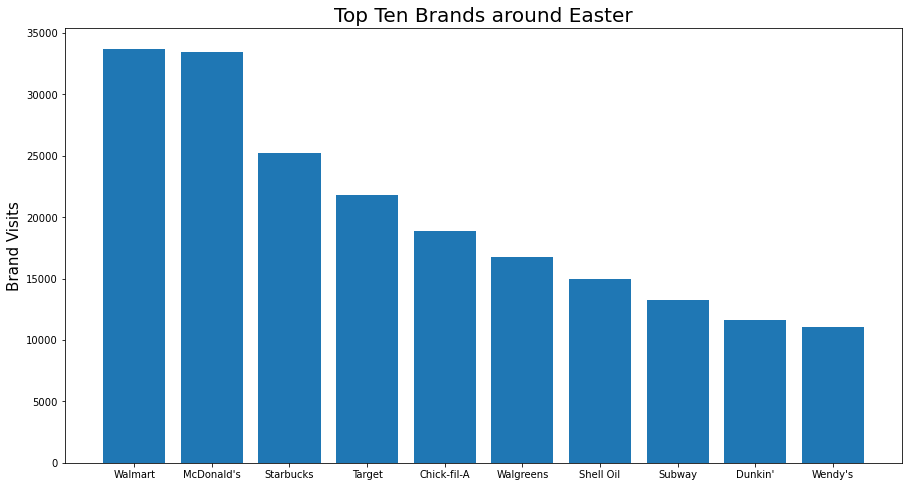

In [125]:

holiday = 'Easter'
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(ten['brand_month'], ten['brand_month_visits'])
plt.title(f"Top Ten Brands around {holiday}", fontsize=20)
ax.set_ylabel("Brand Visits", fontsize=15)